In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
'''
instruction: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
'''
!pip install seaborn 
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [3]:
breast_cancer_wisconsin_diagnostic['data']['original']

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [4]:
import seaborn as sns
sns.__version__


'0.12.2'

In [5]:
'''
We can also change Diagnosis values here with LabelEncoder. But In this code, I will change y values later.


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
control = breast_cancer_wisconsin_diagnostic['data']['original']
control['Diagnosis'] = le.fit_transform(control['Diagnosis'])

control.head(7)
'''

"\nWe can also change Diagnosis values here with LabelEncoder. But In this code, I will change y values later.\n\n\nfrom sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\ncontrol = breast_cancer_wisconsin_diagnostic['data']['original']\ncontrol['Diagnosis'] = le.fit_transform(control['Diagnosis'])\n\ncontrol.head(7)\n"

In [6]:
#defining vectors that will train the model 
feature = ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
           'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
           'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
           'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
           'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
           'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
           'symmetry3', 'fractal_dimension3']
# X will be used for input in training 
# Y will be used for output in prediction but needs to be numerical number instead of string such as B or M.
X = breast_cancer_wisconsin_diagnostic['data']['original'][feature]
y = breast_cancer_wisconsin_diagnostic['data']['original']['Diagnosis']

In [7]:
print(X.head(7))

print('y as an output: \n',y)

   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   
5    12.45     15.70       82.57   477.1      0.12780       0.17000   
6    18.25     19.98      119.60  1040.0      0.09463       0.10900   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0      0.3001          0.14710     0.2419             0.07871  ...    25.38   
1      0.0869          0.07017     0.1812             0.05667  ...    24.99   
2      0.1974          0.12790     0.2069             0.05999  ...    23.57   
3      0.2414          0.10520     0.2597             0.09744  ...    14.91   
4      0.1980          0.10430     0

In [8]:
#as you can see above, output has only two classes, M and B which is called as Binary Classification
#It needs to be converted from string to a value (0 or 1) so that validation/prediction can be handled.
#If the output has 2 type of values, so accuracy as a metric should be used to understand how successful our model is

#preprocessing for changing output to 0 and 1:#
y_binary = [1 if label == 'M' else 0 for label in y]

In [9]:
#splitting process
from sklearn.model_selection import train_test_split
X_train, X_val, y_train,y_val = train_test_split(X,y_binary,test_size = 0.2, random_state = 101)

In [10]:
len(y_train)

455

In [11]:
#preprocessing for the training data which is X
from sklearn.preprocessing import StandardScaler

'''
The main reason that i have to use scaling is each parameter has different weight on this illness. Each parameter 
has different weighted values. If you dont use scaling, the one which is bigger mathematically can manipulate our model
whic is not desired. That`s why scaling needs to be used.

For example:
even though having 0.2 in compactness1 seems smaller than any of texture3, maybe it might be greater effect than texture3 which is 17. In order to eliminate this manipulation, scaling is necessary.

Also, The fitting should be done on the training data, and then the same scaler should be used to transform both the training and validation (or test) data.
'''

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [12]:
len(X_val_scaled)

114

In [13]:
print(X_train_scaled)
print(X_train)

[[ 0.02090193  0.28562106  0.01889271 ...  0.28708398 -0.59963793
  -0.32285831]
 [-0.53400124 -1.40599342 -0.51656117 ... -0.50392051  0.88583908
   0.43518026]
 [-0.2551693  -0.43868901 -0.3137073  ... -0.99299632 -0.22946024
  -0.68461207]
 ...
 [ 0.53715513  0.08001046  0.48846929 ...  0.56225563 -0.41534346
  -1.1291307 ]
 [ 1.28254744  0.49590463  1.24364806 ...  1.36496632  1.21947563
   0.77994255]
 [-0.11437297 -0.1466285  -0.12892951 ...  0.20346828 -0.09918311
   0.32007679]]
     radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
476    14.20     20.53       92.41   618.4      0.08931       0.11080   
130    12.19     13.29       79.08   455.8      0.10660       0.09509   
246    13.20     17.43       84.13   541.6      0.07215       0.04524   
205    15.12     16.68       98.78   716.6      0.08876       0.09588   
16     14.68     20.13       94.74   684.5      0.09867       0.07200   
..       ...       ...         ...     ...          ...           ... 

In [14]:
#Define the model ...
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)

lr_pred = lr.predict(X_val_scaled)

accuracy = accuracy_score(y_val, lr_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9912280701754386


In [15]:
import pandas as pd
myprediction = {'prediction':lr_pred,
               'actual':y_val}
df = pd.DataFrame(myprediction)
df.head(30)
#Show the actual status and its prediction as an table here:

,prediction,actual
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0


In [16]:
#get the feature weights from linear regression
feature_weights = lr.coef_[0] 
print(feature_weights)

[ 0.28682715  0.39169632  0.25379813  0.33067437 -0.0434835  -0.59251333
  0.80852718  1.16705022  0.04523067 -0.38004499  1.39767331 -0.14648417
  0.67453634  0.96791505 -0.14716344 -0.77195665 -0.22306136  0.2679045
 -0.03413991 -0.69631033  0.91261522  1.1631697   0.5842557   0.84800166
  0.87155514  0.06065845  0.79571447  0.92859091  0.56102716  0.62069958]


In [17]:
#plotting graphs for showing the importance of all features' weight
def drawing_graphes(importance,feature,model_name):
    import matplotlib.pyplot as plt
    import seaborn as sns

    feature_weights = importance
    feature = feature
# Create a bar plot of feature weights using seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_weights, y=feature, palette='viridis')

# Adding titles and labels using matplotlib
    plt.xlabel('Feature Weight')
    plt.title('Feature Weights in {}'.format(model_name))

# Display the plot
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


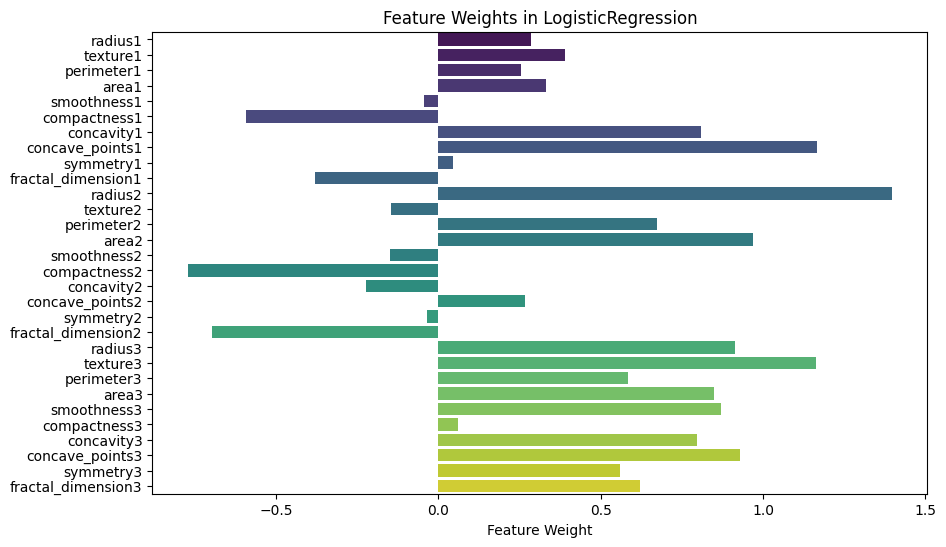

In [18]:
#ploting weight graphs for LR
drawing_graphes(feature_weights,feature,'LogisticRegression')

**Where the coeff value is negative has opposite move against the target. Here, Compactness 1 and 2 has directly opposite movement against to correct prediction. These are not getting strenght our model.  
On the other wise, lets say having radius2 with positive values effect to our models so that it predicts to actual value more. ****

In [19]:
#these section is to plot the confusion matrix to see how much positive&negative true and false we have
from sklearn import metrics
import matplotlib.pyplot as plt


def confusion_matrix(actual,predicted):
    text = 'True Negative (Top-Left Quadrant)// False Positive (Top-Right Quadrant) // False Negative (Bottom-Left Quadrant) // True Positive (Bottom-Right Quadrant)'
    print('Note that',text)

    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
    cm_display.plot()
    plt.show()


Random Forest Classifier : 0.9736842105263158


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


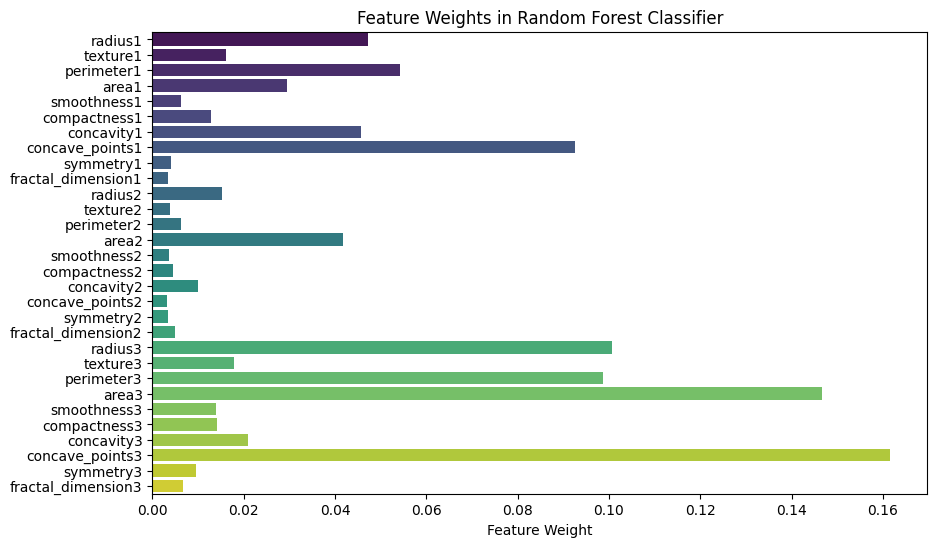

Note that True Negative (Top-Left Quadrant)// False Positive (Top-Right Quadrant) // False Negative (Bottom-Left Quadrant) // True Positive (Bottom-Right Quadrant)


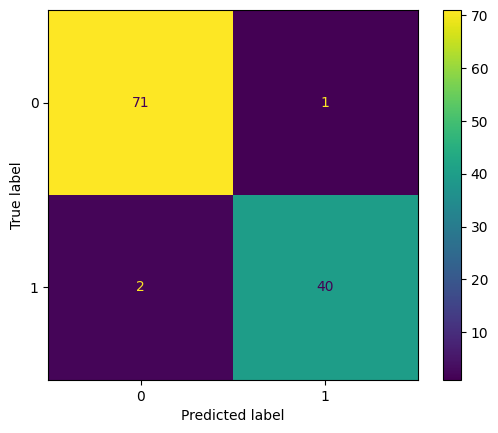

Decision Tree Classifier : 0.9385964912280702


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


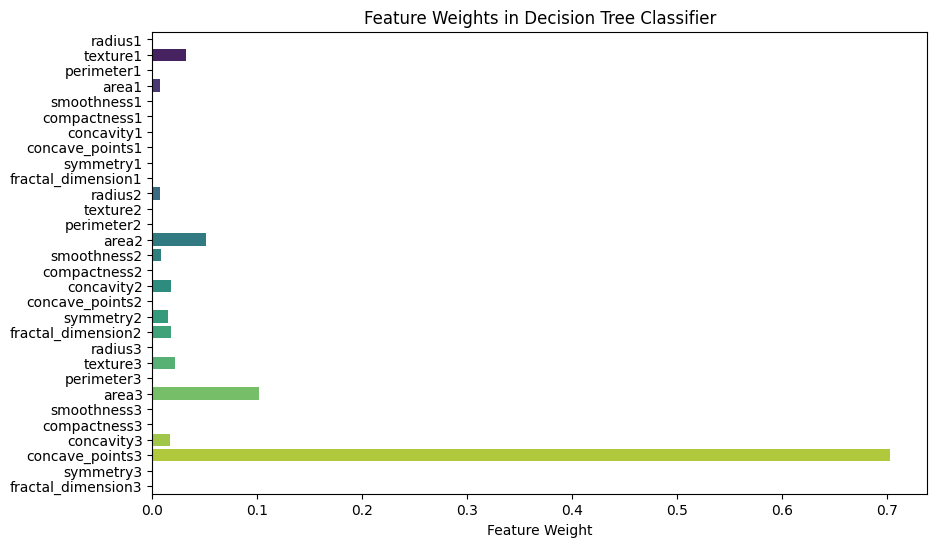

Note that True Negative (Top-Left Quadrant)// False Positive (Top-Right Quadrant) // False Negative (Bottom-Left Quadrant) // True Positive (Bottom-Right Quadrant)


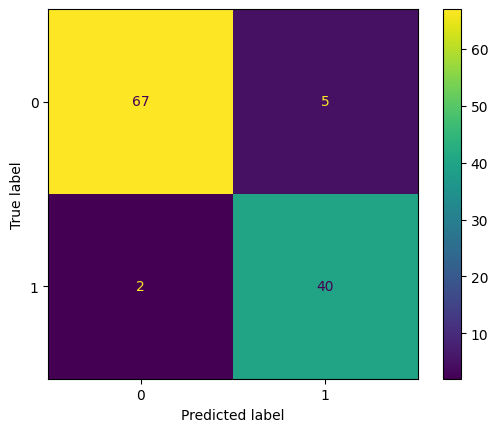

Decision Tree Regressor : 0.9122807017543859


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


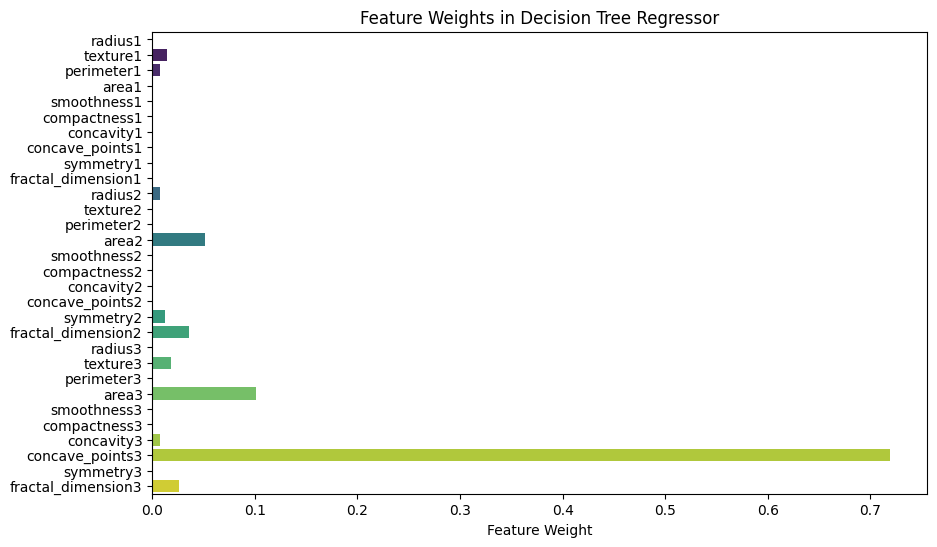

Note that True Negative (Top-Left Quadrant)// False Positive (Top-Right Quadrant) // False Negative (Bottom-Left Quadrant) // True Positive (Bottom-Right Quadrant)


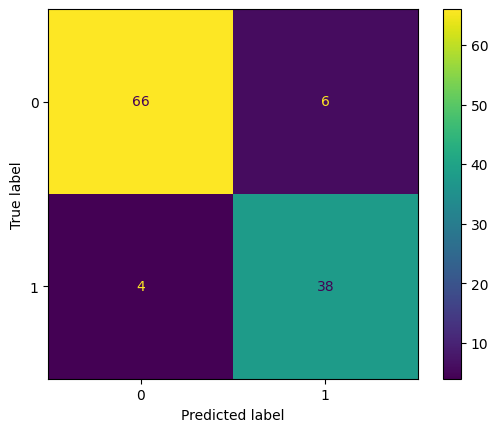

In [20]:
'''
let us see the feature weight on different models here

LR is not working with feature_importance_ which is not attribute of LR. So I used for it with coef lr.coef_[0] 

'''

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

model = {'Random Forest Classifier': RandomForestClassifier(),
        'Decision Tree Classifier': DecisionTreeClassifier(),
        'Decision Tree Regressor': DecisionTreeRegressor(),}
acc_list =[]

for key,value in model.items():

    model_parameter = value
    model_parameter.fit(X_train_scaled,y_train)
    prediction = model_parameter.predict(X_val_scaled)
    print(key,':',accuracy_score(y_val, prediction))
    importance = model_parameter.feature_importances_
    
    drawing_graphes(importance,feature,key)
    
    confusion_matrix(y_val,prediction)
    